In [99]:
import pandas as pd
import numpy as np

In [63]:
raw_data = pd.read_csv('/home/rohitb/projects/ml/Project/assets/OASIS-1/demographic_data/oasis_cross-sectional-5708aa0a98d82080.csv')
raw_data=raw_data.drop(['ID','M/F','Hand','Educ','SES','MMSE','Delay'],axis=1)
raw_data.head()

,Age,CDR,eTIV,nWBV,ASF
0,74,0.0,1344,0.743,1.306
1,55,0.0,1147,0.810,1.531
2,73,0.5,1454,0.708,1.207
3,28,NaN,1588,0.803,1.105
4,18,NaN,1737,0.848,1.010


In [98]:
completed_data = raw_data.dropna()
testing_data = raw_data.dropna()
indices = np.random.choice(testing_data.index, size=int(0.4*len(testing_data['CDR'])), replace=False)


 Here's a quick breakdown of which might be more correlated:

- Age: Highly likely to be correlated with CDR, as older age is a known risk factor for cognitive decline and dementia.
- eTIV (Estimated Total Intracranial Volume): Could have a weaker correlation, as brain volume is indirectly related to age and dementia, but not a direct measure of cognitive decline.
- nWBV (Normalized Whole Brain Volume): More relevant than eTIV, as it reflects the proportion of the brain remaining after accounting for atrophy, which is a hallmark of dementia.
- ASF (Atlas Scaling Factor): Might show some indirect correlation with brain size, but its relevance to cognitive decline could be lower.
- M/F (Gender): There are known differences in how dementia progresses between males and females, so it might have some correlation.
- Hand (Handedness): Likely to have little correlation with CDR.

Filling the CDR values with data imputation methods. In this case Multivariate Imputation by Chained-Equations (MICE) is used.

In [20]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

There will be a comparision done between:
- MICE with Linear Regression
- MICE with Random Forrest Regression
- MICE with Support Vector Regression

And the best one will be chosen

# MICE with Linear Regression

In [100]:
from sklearn.linear_model import LinearRegression

In [101]:
testing_data.loc[indices,'CDR'] = np.nan
testing_data

,Age,CDR,eTIV,nWBV,ASF
0,74,NaN,1344,0.743,1.306
1,55,0.0,1147,0.810,1.531
2,73,0.5,1454,0.708,1.207
8,74,0.0,1636,0.689,1.073
9,52,0.0,1321,0.827,1.329
...,...,...,...,...,...
411,70,0.5,1295,0.748,1.355
412,73,NaN,1536,0.730,1.142
413,61,0.0,1354,0.825,1.297
414,61,NaN,1637,0.780,1.072


In [119]:
lr = LinearRegression()
imp = IterativeImputer(estimator=lr, verbose=2, max_iter=5, imputation_order='roman')


In [120]:
ImputedData = imp.fit_transform(testing_data)

[IterativeImputer] Completing matrix with shape (235, 5)
[IterativeImputer] Ending imputation round 1/5, elapsed time 0.02
[IterativeImputer] Change: 0.4962549984939394, scaled tolerance: 1.992 
[IterativeImputer] Early stopping criterion reached.


In [121]:
Imputed_data = pd.DataFrame(ImputedData)
Imputed_data.columns = ['Age','CDR','eTIV','nWBV','ASF']
Imputed_data.head()

,Age,CDR,eTIV,nWBV,ASF
0,74.0,0.358159,1344.0,0.743,1.306
1,55.0,0.000000,1147.0,0.810,1.531
2,73.0,0.500000,1454.0,0.708,1.207
3,74.0,0.000000,1636.0,0.689,1.073
4,52.0,0.000000,1321.0,0.827,1.329


In [122]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_lr = mean_squared_error(Imputed_data, completed_data)
print(f'Mean Squared Error (MSE): {mse_lr}')

mae_lr = mean_absolute_error(Imputed_data, completed_data)
print(f'Mean Absolute Error (MAE): {mae_lr}')

r_squared_lr = r2_score(Imputed_data, completed_data)
print(f'Coefficient of Determination (R-squared): {r_squared_lr}')

Mean Squared Error (MSE): 0.007249167665397183
Mean Absolute Error (MAE): 0.019273105595594593
Coefficient of Determination (R-squared): 0.9407089590571445


# MICE with Random Forest Regression

In [90]:
from sklearn.ensemble import RandomForestRegressor

In [106]:
testing_data.loc[indices,'CDR'] = np.nan
testing_data

,Age,CDR,eTIV,nWBV,ASF
0,74,NaN,1344,0.743,1.306
1,55,0.0,1147,0.810,1.531
2,73,0.5,1454,0.708,1.207
8,74,0.0,1636,0.689,1.073
9,52,0.0,1321,0.827,1.329
...,...,...,...,...,...
411,70,0.5,1295,0.748,1.355
412,73,NaN,1536,0.730,1.142
413,61,0.0,1354,0.825,1.297
414,61,NaN,1637,0.780,1.072


In [115]:
rf = RandomForestRegressor(n_estimators=100)
imp = IterativeImputer(estimator=rf, verbose=2, max_iter=5, imputation_order='roman')

In [116]:
ImputedData = imp.fit_transform(testing_data)

[IterativeImputer] Completing matrix with shape (235, 5)
[IterativeImputer] Ending imputation round 1/5, elapsed time 1.16
[IterativeImputer] Change: 0.9358510638297871, scaled tolerance: 1.992 
[IterativeImputer] Early stopping criterion reached.


In [117]:
Imputed_data = pd.DataFrame(ImputedData)
Imputed_data.columns = ['Age','CDR','eTIV','nWBV','ASF']
Imputed_data.head()

,Age,CDR,eTIV,nWBV,ASF
0,74.0,0.38,1344.0,0.743,1.306
1,55.0,0.00,1147.0,0.810,1.531
2,73.0,0.50,1454.0,0.708,1.207
3,74.0,0.00,1636.0,0.689,1.073
4,52.0,0.00,1321.0,0.827,1.329


In [118]:
mse_rf = mean_squared_error(Imputed_data, completed_data)
print(f'Mean Squared Error (MSE): {mse_rf}')

mae_rf = mean_absolute_error(Imputed_data, completed_data)
print(f'Mean Absolute Error (MAE): {mae_rf}')

r_squared_rf = r2_score(Imputed_data, completed_data)
print(f'Coefficient of Determination (R-squared): {r_squared_rf}')

Mean Squared Error (MSE): 0.00833655319148936
Mean Absolute Error (MAE): 0.019795744680851064
Coefficient of Determination (R-squared): 0.9346076225332748


# MICE with Support Vector Regression

In [110]:
from sklearn.svm import SVR

In [112]:
testing_data.loc[indices,'CDR'] = np.nan
testing_data

,Age,CDR,eTIV,nWBV,ASF
0,74,NaN,1344,0.743,1.306
1,55,0.0,1147,0.810,1.531
2,73,0.5,1454,0.708,1.207
8,74,0.0,1636,0.689,1.073
9,52,0.0,1321,0.827,1.329
...,...,...,...,...,...
411,70,0.5,1295,0.748,1.355
412,73,NaN,1536,0.730,1.142
413,61,0.0,1354,0.825,1.297
414,61,NaN,1637,0.780,1.072


In [123]:
svm = SVR()
imp = IterativeImputer(estimator=svm, verbose=2, max_iter=5, imputation_order='roman')

In [124]:
ImputedData = imp.fit_transform(testing_data)

[IterativeImputer] Completing matrix with shape (235, 5)
[IterativeImputer] Ending imputation round 1/5, elapsed time 0.02
[IterativeImputer] Change: 0.22309995523955609, scaled tolerance: 1.992 
[IterativeImputer] Early stopping criterion reached.


In [127]:
Imputed_data = pd.DataFrame(ImputedData)
Imputed_data.columns = ['Age','CDR','eTIV','nWBV','ASF']
Imputed_data.head()

,Age,CDR,eTIV,nWBV,ASF
0,74.0,0.105477,1344.0,0.743,1.306
1,55.0,0.000000,1147.0,0.810,1.531
2,73.0,0.500000,1454.0,0.708,1.207
3,74.0,0.000000,1636.0,0.689,1.073
4,52.0,0.000000,1321.0,0.827,1.329


In [128]:
mse_svr = mean_squared_error(Imputed_data, completed_data)
print(f'Mean Squared Error (MSE): {mse_svr}')

mae_svr = mean_absolute_error(Imputed_data, completed_data)
print(f'Mean Absolute Error (MAE): {mae_svr}')

r_squared_svr = r2_score(Imputed_data, completed_data)
print(f'Coefficient of Determination (R-squared): {r_squared_svr}')

Mean Squared Error (MSE): 0.009356371924376713
Mean Absolute Error (MAE): 0.020553787136479998
Coefficient of Determination (R-squared): 0.9170421397100842


# Comparision between different imputation models

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

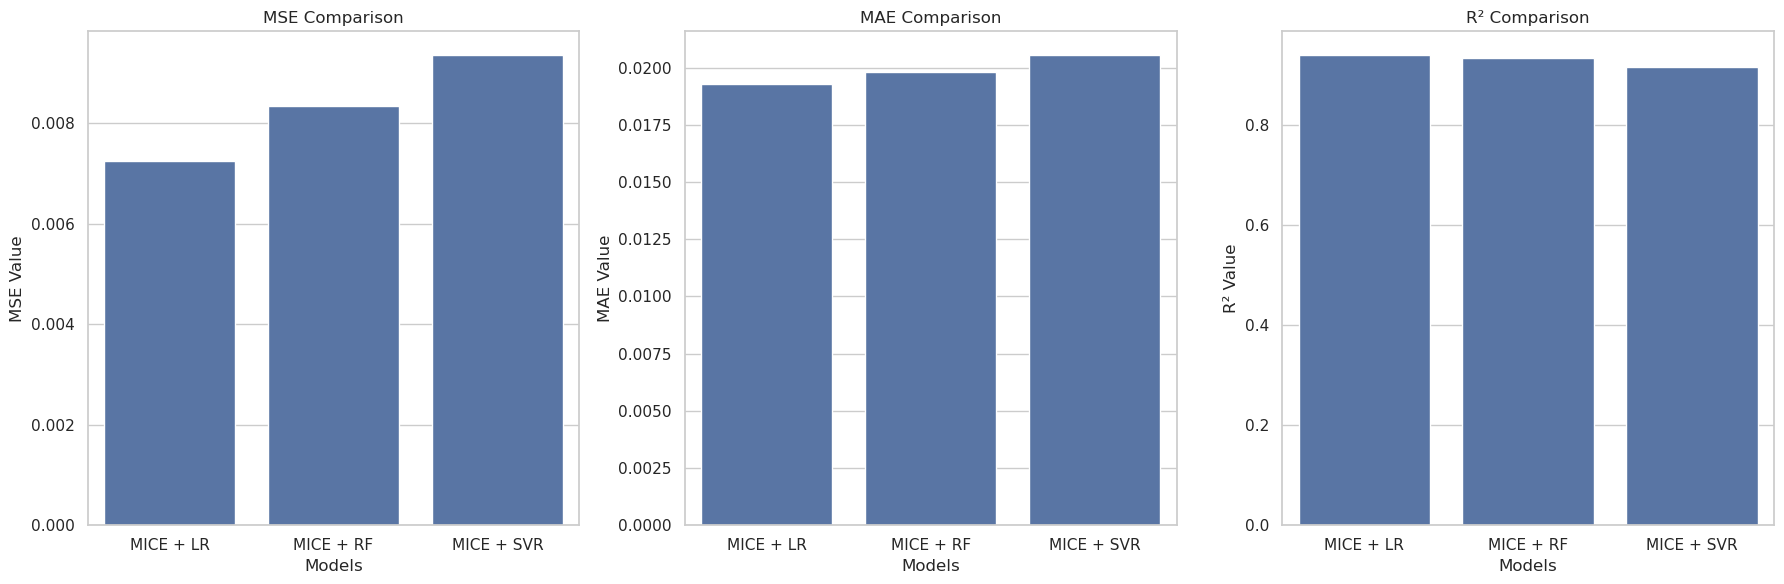

In [140]:
data = {
    'Model': ['MICE + LR', 'MICE + RF', 'MICE + SVR'],
    'MSE': [mse_lr,mse_rf,mse_svr],  # Replace with your actual MSE values
    'MAE': [mae_lr,mae_rf,mae_svr],  # Replace with your actual MAE values
    'R²': [r_squared_lr,r_squared_rf,r_squared_svr]    # Replace with your actual R² values
}

# Create DataFrame
df = pd.DataFrame(data)

# Set the plot style
sns.set(style="whitegrid")

# Create a figure and axes for the subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Bar plot for MSE
sns.barplot(x='Model', y='MSE', data=df, ax=axes[0])
axes[0].set_title('MSE Comparison')
axes[0].set_ylabel('MSE Value')
axes[0].set_xlabel('Models')

# Bar plot for MAE
sns.barplot(x='Model', y='MAE', data=df, ax=axes[1])
axes[1].set_title('MAE Comparison')
axes[1].set_ylabel('MAE Value')
axes[1].set_xlabel('Models')

# Bar plot for R²
sns.barplot(x='Model', y='R²', data=df, ax=axes[2])
axes[2].set_title('R² Comparison')
axes[2].set_ylabel('R² Value')
axes[2].set_xlabel('Models')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


Thus MICE+LR seems to give the best result of data imputation and thus will be used to fill the NAN values

In [146]:
raw_data = pd.read_csv('/home/rohitb/projects/ml/Project/assets/OASIS-1/demographic_data/oasis_cross-sectional-5708aa0a98d82080.csv')
to_impute_data=raw_data.drop(['ID','M/F','Hand','Educ','SES','MMSE','Delay'],axis=1)
to_impute_data

,Age,CDR,eTIV,nWBV,ASF
0,74,0.0,1344,0.743,1.306
1,55,0.0,1147,0.810,1.531
2,73,0.5,1454,0.708,1.207
3,28,NaN,1588,0.803,1.105
4,18,NaN,1737,0.848,1.010
...,...,...,...,...,...
431,20,NaN,1469,0.847,1.195
432,22,NaN,1684,0.790,1.042
433,22,NaN,1580,0.856,1.111
434,20,NaN,1262,0.861,1.390


In [147]:
lr = LinearRegression()
imp = IterativeImputer(estimator=lr, verbose=2, max_iter=5, imputation_order='roman')

In [148]:
ImputedData = imp.fit_transform(to_impute_data)

[IterativeImputer] Completing matrix with shape (436, 5)
[IterativeImputer] Ending imputation round 1/5, elapsed time 0.01
[IterativeImputer] Change: 0.7677185227483003, scaled tolerance: 1.992 
[IterativeImputer] Early stopping criterion reached.


In [160]:
Imputed_data = pd.DataFrame(ImputedData)
Imputed_data.columns = ['Age','CDR','eTIV','nWBV','ASF']
Imputed_data.insert(0,'ID',raw_data['ID'])
Imputed_data.head()

,ID,Age,CDR,eTIV,nWBV,ASF
0,OAS1_0001_MR1,74.0,0.000000,1344.0,0.743,1.306
1,OAS1_0002_MR1,55.0,0.000000,1147.0,0.810,1.531
2,OAS1_0003_MR1,73.0,0.500000,1454.0,0.708,1.207
3,OAS1_0004_MR1,28.0,0.209617,1588.0,0.803,1.105
4,OAS1_0005_MR1,18.0,0.000164,1737.0,0.848,1.010


In [161]:
def round_to_half(value):
    return round(value * 2) / 2

Imputed_data['CDR'] = Imputed_data['CDR'].apply(round_to_half)


In [163]:
Imputed_data.head()

,ID,Age,CDR,eTIV,nWBV,ASF
0,OAS1_0001_MR1,74.0,0.0,1344.0,0.743,1.306
1,OAS1_0002_MR1,55.0,0.0,1147.0,0.810,1.531
2,OAS1_0003_MR1,73.0,0.5,1454.0,0.708,1.207
3,OAS1_0004_MR1,28.0,0.0,1588.0,0.803,1.105
4,OAS1_0005_MR1,18.0,0.0,1737.0,0.848,1.010


In [162]:
Imputed_data.to_csv('./oasis_cleaned.csv')